[Table of Contents](./table_of_contents.ipynb)

# Preface

In [1]:
%matplotlib inline

In [1]:
import matplotlib
print(matplotlib.get_backend())

module://matplotlib_inline.backend_inline


In [2]:
#format the book
import book_format
book_format.set_style()

Introductory textbook for Kalman filters and Bayesian filters. The book is written using Jupyter Notebook so you may read the book in your browser and also run and modify the code, seeing the results inside the book. What better way to learn?

## Kalman and Bayesian Filters

Sensors are noisy. The world is full of data and events that we want to measure and track, but we cannot rely on sensors to give us perfect information. The GPS in my car reports altitude. Each time I pass the same point in the road it reports a slightly different altitude. My kitchen scale gives me different readings if I weigh the same object twice.

In simple cases the solution is obvious. If my scale gives slightly different readings I can just take a few readings and average them. Or I can replace it with a more accurate scale. But what do we do when the sensor is very noisy, or the environment makes data collection difficult? We may be trying to track the movement of a low flying aircraft. We may want to create an autopilot for a drone, or ensure that our farm tractor seeded the entire field. I work on computer vision, and I need to track moving objects in images, and the computer vision algorithms create very noisy and unreliable results. 

This book teaches you how to solve these sorts of filtering problems. I use many different algorithms, but they are all based on *Bayesian probability*. In simple terms Bayesian probability determines what is likely to be true based on past information. 

If I asked you the heading of my car at this moment you would have no idea. You'd proffer a number between 1$^\circ$ and 360$^\circ$ degrees, and have a 1 in 360 chance of being right. Now suppose I told you that 2 seconds ago its heading was 243$^\circ$. In 2 seconds my car could not turn very far so you could make a far more accurate prediction. You are using past information to more accurately infer information about the present or future. 

The world is also noisy. That prediction helps you make a better estimate, but it also subject to noise. I may have just braked for a dog or swerved around a pothole. Strong winds and ice on the road  are external influences on the path of my car. In control literature we call this *noise* though you may not think of it that way. 

There is more to Bayesian probability, but you have the main idea. Knowledge is uncertain, and we alter our beliefs based on the strength of the evidence. Kalman and Bayesian filters blend our noisy and limited knowledge of how a system behaves with the noisy and limited sensor readings to produce the best possible estimate of the state of the system. Our principle is to never discard information. 

Say we are tracking an object and a sensor reports that it suddenly changed direction. Did it really turn, or is the data noisy? It depends. If this is a jet fighter we'd be very inclined to believe the report of a sudden maneuver. If it is a freight train on a straight track we would discount it. We'd further modify our belief depending on how accurate the sensor is. Our beliefs depend on the past and on our knowledge of the system we are tracking and on the characteristics of the sensors. 

The Kalman filter was invented by Rudolf Emil Kálmán to solve this sort of problem in a mathematically optimal way. Its first use was on the Apollo missions to the moon, and since then it has been used in an enormous variety of domains. There are Kalman filters in aircraft, on submarines, and on cruise missiles. Wall street uses them to track the market. They are used in robots, in IoT (Internet of Things) sensors, and in laboratory instruments. Chemical plants use them to control and monitor reactions. They are used to perform medical imaging and to remove noise from cardiac signals. If it involves a sensor and/or time-series data, a Kalman filter or a close relative to the Kalman filter is usually involved.

## Motivation for this Book

I'm a software engineer that spent almost two decades in aerospace, and so I have always been 'bumping elbows' with the Kalman filter, but never implemented one. They've always had a fearsome reputation for difficulty. The theory is beautiful, but quite difficult to learn if you are not already well trained in topics such as signal processing, control theory, probability and statistics, and guidance and control theory. As I moved into solving tracking problems with computer vision the need to implement them myself became urgent. 

There are excellent textbooks in the field, such as Grewal and Andrew's *Kalman Filtering*. But sitting down and trying to read many of these books is a dismal and trying experience if you do not have the necessary background. Typically the first few chapters fly through several years of undergraduate math, blithely referring you to textbooks on Itō calculus, and presenting an entire semester's worth of statistics in a few brief paragraphs. They are textbooks for an upper undergraduate  or graduate level course, and an invaluable reference to researchers and professionals, but the going is truly difficult for the more casual reader. Notation is introduced without explanation, different texts use different words and variable names for the same concept, and the books are almost devoid of examples or worked problems. I often found myself able to parse the words and comprehend the mathematics of a definition, but had no idea as to what real world phenomena these words and math were attempting to describe. "But what does that *mean?*" was my repeated thought. Here are typical examples which once puzzled me:

$$\begin{aligned}\hat{x}_{k} = \Phi_{k}\hat{x}_{k-1} + G_k u_{k-1} + K_k [z_k - H \Phi_{k} \hat{x}_{k-1} - H G_k u_{k-1}]
\\ 
\mathbf{P}_{k\mid k} = (I - \mathbf{K}_k \mathbf{H}_{k})\textrm{cov}(\mathbf{x}_k - \hat{\mathbf{x}}_{k\mid k-1})(I - \mathbf{K}_k \mathbf{H}_{k})^{\text{T}}  + \mathbf{K}_k\textrm{cov}(\mathbf{v}_k )\mathbf{K}_k^{\text{T}}\end{aligned}$$

However, as I began to finally understand the Kalman filter I realized the underlying concepts are quite straightforward. If you know a few simple probability rules, and have some intuition about how we fuse uncertain knowledge, the concepts of the Kalman filter are accessible. Kalman filters have a reputation for difficulty, but shorn of much of the formal terminology the beauty of the subject and of their math became clear to me, and I fell in love with the topic. 

As I began to understand the math and theory more difficulties appeared. A book or paper will make some statement of fact and presents a graph as proof.  Unfortunately, why the statement is true is not clear to me, or I cannot reproduce the plot. Or maybe I wonder "is this true if R=0?"  Or the author provides pseudocode at such a high level that the implementation is not obvious. Some books offer Matlab code, but I do not have a license to that expensive package. Finally, many books end each chapter with many useful exercises. Exercises which you need to understand if you want to implement Kalman filters for yourself, but exercises with no answers. If you are using the book in a classroom, perhaps this is okay, but it is terrible for the independent reader. I loathe that an author withholds information from me, presumably to avoid 'cheating' by the student in the classroom.

All of this impedes learning. I want to track an image on a screen, or write some code for my Arduino project. I want to know how the plots in the book are made, and to choose different parameters than the author chose. I want to run simulations. I want to inject more noise into the signal and see how a filter performs. There are thousands of opportunities for using Kalman filters in everyday code, and yet this fairly straightforward topic is the provenance of rocket scientists and academics.

I wrote this book to address all of those needs. This is not the sole book for you if you design military radars. Go get a Masters or PhD at a great STEM school, because you'll need it. This book is for the hobbyist, the curious, and the working engineer that needs to filter or smooth data. If you are a hobbyist this book should provide everything you need. If you are serious about Kalman filters you'll need more. My intention is to introduce enough of the concepts and mathematics to make the textbooks and papers approachable.

This book is interactive. While you can read it online as static content, I urge you to use it as intended. It is written using Jupyter Notebook. This allows me to combine text, math, Python, and Python output in one place. Every plot, every piece of data in this book is generated from Python inside the notebook. Want to double the value of a parameter? Just change the parameter's value, and press CTRL-ENTER. A new plot or printed output will appear. 

This book has exercises, but it also has the answers. I trust you. If you just need an answer, go ahead and read the answer. If you want to internalize this knowledge, try to implement the exercise before you read the answer. Since the book is interactive, you enter and run your solution inside the book - you don't have to move to a different environment, or deal with importing a bunch of stuff before starting.

This book is free. I've spent several thousand dollars on Kalman filtering books. I cannot believe they are within the reach of someone in a depressed economy or a financially struggling student. I have gained so much from free software like Python, and free books like those from Allen B. Downey  [1]. It's time to repay that. So, the book is free, it is hosted on free servers at GitHub, and it uses only free and open software such as IPython and MathJax.

## Reading Online

<b>GitHub</b>

The book is hosted on GitHub, and you can read any chapter by clicking on its name. GitHub statically renders Jupyter Notebooks. You will not be able to run or alter the code, but you can read all of the content.

The GitHub pages for this project are at

    https://github.com/rlabbe/Kalman-and-Bayesian-Filters-in-Python 


<b>binder</b>

binder serves interactive notebooks online, so you can run the code and change the code within your browser without downloading the book or installing Jupyter. Use this link to access the book via binder:

    http://mybinder.org/repo/rlabbe/Kalman-and-Bayesian-Filters-in-Python

<b>nbviewer</b>

The nbviewer website will render any Notebook in a static format. I find it does a slightly better job than the GitHub renderer, but it is slighty harder to use. It accesses GitHub directly; whatever I have checked into GitHub will be rendered by nbviewer.

You may access this book via nbviewer here:

http://nbviewer.ipython.org/github/rlabbe/Kalman-and-Bayesian-Filters-in-Python/blob/master/table_of_contents.ipynb

## PDF Version

I periodically generate a PDF of the book from the notebooks. You can access it here:

https://drive.google.com/file/d/0By_SW19c1BfhSVFzNHc0SjduNzg/view?usp=sharing

## Downloading and Running the Book

However, this book is intended to be interactive and I recommend using it in that form. It's a little more effort to set up, but worth it. If you install IPython and some supporting libraries  on your computer and then clone this book you will be able to run all of the code in the book yourself. You can perform experiments, see how filters react to different data, see how different filters react to the same data, and so on. I find this sort of immediate feedback both vital and invigorating. You do not have to wonder "what happens if". Try it and see!

Instructions for installation can be found in the Installation appendix, found [here](http://nbviewer.ipython.org/github/rlabbe/Kalman-and-Bayesian-Filters-in-Python/blob/master/Appendix-A-Installation.ipynb).

Once the software is installed you can navigate to the installation directory and run Juptyer notebook with the command line instruction

    jupyter notebook

This will open a browser window showing the contents of the base directory. The book is organized into chapters. Each chapter is named *xx*-*name*.ipynb, where *xx* is the chapter number. .ipynb is the Notebook file extension. To read Chapter 2, click on the link for chapter 2. This will cause the browser to open that subdirectory. In each subdirectory there will be one or more IPython Notebooks (all notebooks have a .ipynb file extension). The chapter contents are in the notebook with the same name as the chapter name. There are sometimes supporting notebooks for doing things like generating animations that are displayed in the chapter. These are not intended to be read by the end user, but of course if you are curious as to how an animation is made go ahead and take a look.

Admittedly this is a cumbersome interface to a book. I am following in the footsteps of several other projects that are re-purposing Jupyter Notebook to generate entire books. I feel the slight annoyances have a huge payoff - instead of having to download a separate code base and run it in an IDE while you try to read a book, all of the code and text is in one place. If you want to alter the code, you may do so and immediately see the effects of your change. If you find a bug, you can make a fix, and push it back to my repository so that everyone in the world benefits. And, of course, you will never encounter a problem I face all the time with traditional books - the book and the code are out of sync with each other, and you are left scratching your head as to which source to trust.

## Jupyter

First, some words about using Jupyter Notebooks with this book. This book is interactive. If you want to run code examples, and especially if you want to see animated plots, you will need to run the code cells. I cannot teach you everything about Jupyter Notebooks. However, a few things trip readers up. You can go to http://jupyter.org/ for detailed documentation.

First, you must always run the topmost code cell, the one with the comment `#format the book`. It is directly above. This does not just set up formatting, which you might not care about, but it also loads some necessary modules and makes some global settings regarding plotting and printing. So, always run this cell unless you are just passively reading. 

The line

```python
%matplotlib inline
```
causes plots to be displayed inside the notebook. Matplotlib is a plotting package which is described below. For reasons I don't understand the default behavior of Jupyter Notebooks is to generate plots in an external window. 

The percent sign in `%matplotlib` is used for IPython *magic* - these are commands to the kernel to do things that are not part of the Python language. There are many useful magic commands, and you can read about them here: http://ipython.readthedocs.io/en/stable/interactive/magics.html 

Running the code inside a cell is easy. Click on it so that it has focus (a box will be drawn around it), and then press CTRL-Enter. 

Second, cells must be run in order. I break problems up over several cells; if you try to just skip down and run the tenth code cell it almost certainly won't work. If you haven't run anything yet just choose *Run All Above* from the **Cell** menu item. That's the easiest way to ensure everything has been run.

Once cells are run you can often jump around and rerun cells in different orders, but not always. I'm trying to fix this, but there is a tradeoff. I'll define a variable in cell 10 (say), and then run code that modifies that variable in cells 11 and 12. If you go back and run cell 11 again the variable will have the value that was set in cell 12, and the code expects the value that was set in cell 10. So, occasionally you'll get weird results if you run cells out of order. My advise is to backtrack a bit, and run cells in order again to get back to a proper state. It's annoying, but the interactive aspect of Jupyter notebooks more than makes up for it. Better yet, submit an issue on GitHub so I know about the problem and fix it!

Finally, some readers have reported problems with the animated plotting features in some browsers. I have not been able to reproduce this. In parts of the book I use the `%matplotlib notebook` magic, which enables interactive plotting. If these plots are not working for you, try changing this to read `%matplotlib inline`. You will lose the animated plotting, but it seems to work on all platforms and browsers.

## SciPy, NumPy, and Matplotlib

SciPy is a open source collection of software for mathematics. Included in SciPy are NumPy, which provides array objects, linear algebra, random numbers, and more. Matplotlib provides plotting of NumPy arrays. SciPy's modules duplicate some of the functionality in NumPy while adding features such as optimization, image processing, and more.

To keep my efforts for this book managable I have elected to assume that you know how to program in Python, and that you also are familiar with these packages. Nonetheless, I will take a few moments to illustrate a few features of each; realistically you will have to find outside sources to teach you the details. The home page for SciPy, https://scipy.org, is the perfect starting point, though you will soon want to search for relevant tutorials and/or videos.

NumPy, SciPy, and Matplotlib do not come with the default Python distribution; see the *Installation* Appendix if you do not have them installed.

I use NumPy's array data structure throughout the book, so let's learn about them now. I will teach you enough to get started; refer to NumPy's documentation if you want to become an expert.

`numpy.array` implements a one or more dimensional array. Its type is `numpy.ndarray`, and we will refer to this as an ndarray for short. You can construct it with any list-like object. The following constructs a 1-D array from a list:

In [3]:
import numpy as np
x = np.array([1, 2, 3])
print(type(x))
x

<class 'numpy.ndarray'>


array([1, 2, 3])

It has become a industry standard to use `import numpy as np`. 

You can also use tuples:

In [4]:
x = np.array((4,5,6))
x

array([4, 5, 6])

Create multidimensional arrays with nested brackets:

In [5]:
x = np.array([[1, 2, 3],
              [4, 5, 6]])
print(x)

[[1 2 3]
 [4 5 6]]


You can create arrays of 3 or more dimensions, but we have no need for that here, and so I will not elaborate.

By default the arrays use the data type of the values in the list; if there are multiple types then it will choose the type that most accurately represents all the values. So, for example, if your list contains a mix of `int` and `float` the data type of the array would be of type `float`. You can override this with the `dtype` parameter.

In [6]:
x = np.array([1, 2, 3], dtype=float)
print(x)

[1. 2. 3.]


You can access the array elements using subscript location:

In [7]:
x = np.array([[1, 2, 3],
              [4, 5, 6]])

print(x[1,2])

6


You can access a column or row by using slices. A colon (:) used as a subscript is shorthand for all data in that row or column. So `x[:,0]` returns an array of all data in the first column (the 0 specifies the first column):

In [8]:
x[:, 0]

array([1, 4])

We can get the second row with:

In [9]:
x[1, :]

array([4, 5, 6])

Get the last two elements of the second row with:

In [10]:
x[1, 1:]

array([5, 6])

As with Python `list`s, you can use negative indexes to refer to the end of the array. -1 refers to the last index. So another way to get the last two elements of the second (last) row would be:

In [11]:
x[-1, -2:]

array([5, 6])

You can perform matrix addition with the `+` operator, but matrix multiplication requires the `dot` method or function. The `*` operator performs element-wise multiplication, which is **not** what you want for linear algebra.

In [12]:
x = np.array([[1., 2.],
              [3., 4.]])
print('addition:\n', x + x)
print('\nelement-wise multiplication\n', x * x)
print('\nmultiplication\n', np.dot(x, x))
print('\ndot is also a member of np.array\n', x.dot(x))

addition:
 [[2. 4.]
 [6. 8.]]

element-wise multiplication
 [[ 1.  4.]
 [ 9. 16.]]

multiplication
 [[ 7. 10.]
 [15. 22.]]

dot is also a member of np.array
 [[ 7. 10.]
 [15. 22.]]


Python 3.5 introduced the `@` operator for matrix multiplication.

In [13]:
x @ x

array([[ 7., 10.],
       [15., 22.]])

This will only work if you are using Python 3.5+. This book requires 3.6 or later, so I will use it whenever I can. Note that the operator requires that both values are arrays. Hence, `x @ 3.` raises a ValueError whereas `np.dot(X, 3.)` works fine.

You can get the transpose with `.T`, and the inverse with `numpy.linalg.inv`. The SciPy package also provides the inverse function.

In [14]:
import scipy.linalg as linalg
print('transpose\n', x.T)
print('\nNumPy ninverse\n', np.linalg.inv(x))
print('\nSciPy inverse\n', linalg.inv(x))

transpose
 [[1. 3.]
 [2. 4.]]

NumPy ninverse
 [[-2.   1. ]
 [ 1.5 -0.5]]

SciPy inverse
 [[-2.   1. ]
 [ 1.5 -0.5]]


There are helper functions like `zeros` to create a matrix of all zeros, `ones` to get all ones, and `eye` to get the identity matrix. If you want a multidimensional array, use a tuple to specify the shape.

In [15]:
print('zeros\n', np.zeros(7))
print('\nzeros(3x2)\n', np.zeros((3, 2)))
print('\neye\n', np.eye(3))

zeros
 [0. 0. 0. 0. 0. 0. 0.]

zeros(3x2)
 [[0. 0.]
 [0. 0.]
 [0. 0.]]

eye
 [[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


We have functions to create equally spaced data. `arange` works much like Python's `range` function, except it returns a NumPy array. `linspace` works slightly differently, you call it with `linspace(start, stop, num)`, where `num` is the length of the array that you want.

In [16]:
np.arange(0, 2, 0.1)

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1,
       1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9])

In [17]:
np.linspace(0, 2, 20)

array([0.   , 0.105, 0.211, 0.316, 0.421, 0.526, 0.632, 0.737, 0.842,
       0.947, 1.053, 1.158, 1.263, 1.368, 1.474, 1.579, 1.684, 1.789,
       1.895, 2.   ])

Now let's plot some data. For the most part it is very simple. Matplotlib contains a plotting library `pyplot`. It is industry standard to import it as `plt`. Once imported, plot numbers by calling `plt.plot` with a list or array of numbers. If you make multiple calls it will plot multiple series, each with a different color.

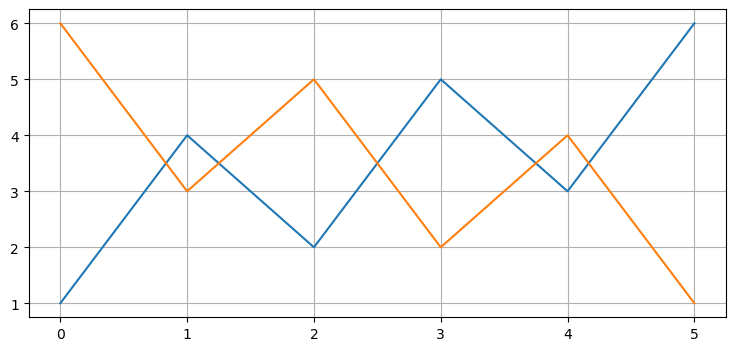

In [18]:
import matplotlib.pyplot as plt
a = np.array([6, 3, 5, 2, 4, 1])
plt.plot([1, 4, 2, 5, 3, 6])
plt.plot(a)

The output `[<matplotlib.lines.Line2D at 0x2ba160bed68>]` is because `plt.plot` returns the object that was just created. Ordinarily we do not want to see that, so I add a `;` to my last plotting command to suppress that output.

By default `plot` assumes that the x-series is incremented by one. You can provide your own x-series by passing in both x and y.

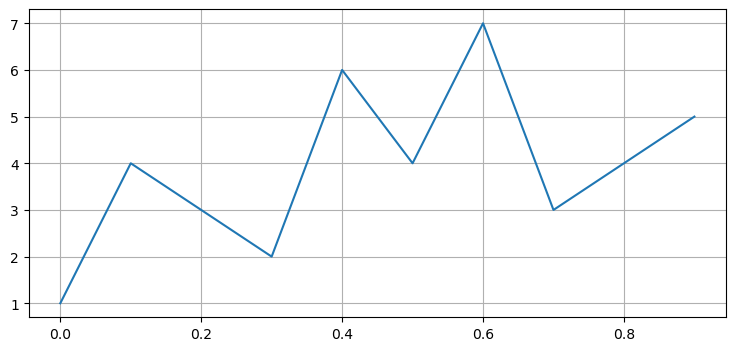

In [19]:
plt.plot(np.arange(0,1, 0.1), [1,4,3,2,6,4,7,3,4,5]);

There are many more features to these packages which I use in this book. Normally I will introduce them without explanation, trusting that you can infer the usage from context, or search online for an explanation. As always, if you are unsure, create a new cell in the Notebook or fire up a Python console and experiment!

### Exercise -  Create arrays

I want you to create a NumPy array of 10 elements with each element containing 1/10. There are several ways to do this; try to implement as many as you can think of. 

In [20]:
# your solution

### Solution

Here are three ways to do this. The first one is the one I want you to know. I used the '/' operator to divide all of the elements of the array with 10. We will shortly use this to convert the units of an array from meters to km.

In [21]:
print(np.ones(10) / 10.)
print(np.array([.1, .1, .1, .1, .1, .1, .1, .1, .1, .1]))
print(np.array([.1] * 10))

[0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
[0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
[0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]


Here is one I haven't covered yet. The function `numpy.asarray()` will convert its argument to an ndarray if it isn't already one. If it is, the data is unchanged. This is a handy way to write a function that can accept either Python lists or ndarrays, and it is very efficient if the type is already ndarray as nothing new is created.

In [22]:
def one_tenth(x):
    x = np.asarray(x)
    return x / 10.

print(one_tenth([1, 2, 3]))            # I work!
print(one_tenth(np.array([4, 5, 6])))  # so do I!

[0.1 0.2 0.3]
[0.4 0.5 0.6]


## Companion Software

I am writing an open source Bayesian filtering Python library called FilterPy. Installation instructions are given above.

FilterPy is hosted GitHub at (https://github.com/rlabbe/filterpy) but the `pip` installed version should serve your needs.

Code that is specific to the book is stored with the book in the subdirectory **/kf_book**. It contains code for formatting the book. It also contains python files with names like *xxx*_internal.py. I use these to store functions that are useful for a specific chapter. This allows me to hide Python code that is not particularly interesting to read - I may be generating a plot or chart, and I want you to focus on the contents of the chart, not the mechanics of how I generate that chart with Python. If you are curious as to the mechanics of that, just go and browse the source.

Some chapters introduce functions that are useful for the rest of the book. Those functions are initially defined within the Notebook itself, but the code is also stored in a Python file in **/kf_book** that is imported if needed in later chapters. I do document when I do this where the function is first defined, but this is still a work in progress. I try to avoid this because then I always face the issue of code in the directory becoming out of sync with the code in the book. However, Jupyter Notebook does not give us a way to refer to code cells in other notebooks, so this is the only mechanism I know of to share functionality across notebooks.

There is an undocumented directory called **/experiments**. This is where I write and test code prior to putting it in the book. There is some interesting stuff in there, and feel free to look at it. As the book evolves I plan to create examples and projects, and a lot of this material will end up there. Small experiments will eventually just be deleted. If you are just interested in reading the book you can safely ignore this directory. 


The directory **/kf_book** contains a css file containing the style guide for the book. The default look and feel of Jupyter Notebook is rather plain. I have followed the examples set by books such as [Probabilistic Programming and Bayesian Methods for Hackers](http://nbviewer.ipython.org/github/CamDavidsonPilon/Probabilistic-Programming-and-Bayesian-Methods-for-Hackers/blob/master/Chapter1_Introduction/Chapter1.ipynb) [2]. I have also been very influenced by Professor Lorena Barba's fantastic work, [available here](https://github.com/barbagroup/CFDPython) [3]. I owe all of my look and feel to the work of these projects. 

## Thoughts on Python and Coding Math

Most Kalman filtering and other engineering texts are written by mathematicians or academics. When there is software (rarely), it is not production quality. Take Paul Zarchan's book *Fundamentals of Kalman Filtering* as an example. This is a fantastic book which belongs in your library, and is one of the few books that provides full source for every example and chart. But the code is Fortran without any subroutines beyond calls to functions like `MATMUL`. Kalman filters are re-implemented throughout the book. The same listing mixes simulation with filtering code, making it hard to distinguish them. Some chapters implement the same filter in subtly different ways, and uses bold text to highlight the few lines that changed. If Runge Kutta is needed it is embedded in the code, without comments. 

There's a better way. If I want to perform Runge Kutta I call `ode45`, I do not embed an Runge Kutta implementation in my code. I don't want to implement Runge Kutta multiple times and debug it several times. if I do find a bug, I can fix it once and be assured that it now works across all my different projects. And, it is readable. It is rare that I care about the implementation of Runge Kutta.

This is a textbook on Kalman filtering, and you can argue that we *do* care about the implementation of Kalman filters. That is true, but the code that performs the filtering uses about 10 lines of code. The code to implement the math is fairly trivial. Most of the work that Kalman filter requires is the design of the matrices that get fed into the math engine.

A possible downside is that the equations that perform the filtering are hidden behind functions, which we could argue is a loss in a pedagogical text. I argue the converse. I want you to learn how to use Kalman filters in the real world, for real projects, and you shouldn't be cutting and pasting established algorithms all over the place.

I use Python classes. I mostly use classes as a way to organize the data that the filters require, not to implement object oriented (OO) features such as inheritence. For example, the `KalmanFilter` class stores matrices and vectors called `x`, `P`, `R`, `Q`, `S`, `y`, `K`. I've seen procedural libraries for Kalman filters, and they require the programmer to maintain all of those matrices. This perhaps isn't so bad for a toy program, but program a bank of Kalman filters and you will not enjoy having to manage all of those matrices and other associated data. I have derived from these classes occasionally in my own work, and find it handy, but I don't want to force OO on people as I know many do not like it.

## License

<a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/"><img alt="Creative Commons License" style="border-width:0" src="http://i.creativecommons.org/l/by-nc-sa/4.0/88x31.png" /></a><br /><span xmlns:dct="http://purl.org/dc/terms/" property="dct:title">Kalman Filters and Random Signals in Python</span> by <a xmlns:cc="http://creativecommons.org/ns#" href="https://github.com/rlabbe/Kalman-Filters-and-Random-Signals-in-Python" property="cc:attributionName" rel="cc:attributionURL">Roger Labbe</a> is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/">Creative Commons Attribution-NonCommercial-ShareAlike 4.0 International License</a>.<br />

http://creativecommons.org/licenses/by-nc-sa/4.0/

Based on the work at <a xmlns:dct="http://purl.org/dc/terms/" href="https://github.com/rlabbe/Kalman-and-Bayesian-Filters-in-Python" rel="dct:source">https://github.com/rlabbe/Kalman-and-Bayesian-Filters-in-Python</a>.

## Contact

rlabbejr@gmail.com

## Resources

* [1] http://www.greenteapress.com/
* [2] http://nbviewer.ipython.org/github/CamDavidsonPilon/Probabilistic-Programming-and-Bayesian-Methods-for-Hackers/blob/master/Chapter1_Introduction/Chapter1.ipynb
* [3] https://github.com/barbagroup/CFDPython